In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# read in the data
# df = dataFrame
df = pd.read_csv(r'/Users/aziz/Desktop/Developer/correlation in python/movies.csv')

In [20]:
# peek at the data 
df.head(100)

name  rating  genre  year  released  score      votes  director  writer  \
0   6587       7      6  1980      1706    8.4   927000.0      2589    4015   
1   5573       7      1  1980      1493    5.8    65000.0      2269    1633   
2   5142       5      0  1980      1772    8.7  1200000.0      1111    2568   
3    286       5      4  1980      1493    7.7   221000.0      1301    2001   
4   1027       7      4  1980      1544    7.3   108000.0      1054     522   
5   2109       7     10  1980      2503    6.4   123000.0      2528    4363   
6   5574       7      0  1980      1772    7.9   188000.0      1412     839   
7   4436       7      3  1980       700    8.2   330000.0      1829    1770   
8   5281       5      0  1980      1754    6.8   101000.0      2306    1980   
9   6213       7      3  1980      2287    7.0    10000.0      2864     424   
10   463       5      0  1980       675    6.1    18000.0       357    3986   
11  5920       5      1  1980      2988    7.3    54000.0      1199    1833   
12  4315       5      1  1980       627    5.3    30000.0      2352    2334   
13  4084       7      6  1980      3212    7.7    49000.0      2388    2328   
14  1687       7      5  1980      1544    7.1    37000.0       318     521   
15  5024       5      6  1980      3022    7.2    27000.0      1243    3549   
16  1900       7      6  1980      2287    6.6    21000.0        49     736   
17    92       5      4  1980       700    6.9    29000.0       514    3263   
18  5865       7     10  1980      1109    6.8    66000.0      1374    2105   
19  5189       7      4  1980       627    6.8    26000.0      2561     557   
20  1387       7      5  1980       946    6.5    20000.0      2891    4452   
21  2451       7      1  1980       161    6.8    14000.0      1892    2927   
22  5845       5      0  1980       282    6.7    22000.0       744    4193   
23  7445       5      8  1980       586    5.3    12000.0      2371    3529   
24  7127       5      6  1980      1914    6.4    14000.0      1153      13   
25   346       7     10  1980       774    6.9    33000.0      1583    3235   
26  3263       7      4  1980      2060    6.5     5100.0      2433    2484   
27  4442       5      0  1980       282    5.0     4100.0      1282      34   
28   980       7      5  1980      1772    7.2    17000.0      2673    4387   
29   362       7      5  1980       887    6.2    22000.0      2151    3327   
30  3796       5      4  1980      3297    7.1     8900.0      2811      84   
31  4373       7     10  1980      1468    5.4    16000.0      2143    4456   
32  4987       5      0  1980       343    5.3    15000.0      1041    1588   
33  1103       5      6  1980       161    6.1      604.0      1644     959   
34  4785       5      4  1980       700    6.7     9100.0      1225    3137   
35  4362       7      4  1980      2819    6.2    24000.0      1091    3108   
36  6008       7      4  1980      2453    6.3     4300.0       855    1359   
37  3721       7      4  1980      2966    6.0    11000.0      1598    3643   
38  6102       5      6  1980       700    5.9     4000.0      2296    3827   
39  1244       5      3  1980      2196    7.5    17000.0      1884    4202   
40  6748       5      7  1980      3102    6.3     5700.0      1403     519   
41   927       5      6  1980      1589    7.9    13000.0       335    2253   
42  6644       7      0  1980      1837    7.1     9000.0      2314    2544   
43  7305       7      3  1980       170    6.6    11000.0       186    1683   
44  5504       7     10  1980      3043    4.8     2000.0      1978     152   
45  1152       7      4  1980      1468    6.1    12000.0      2804    4299   
46  6094       7      0  1980      1706    5.3     3900.0      1934    3358   
47  5578       7     10  1980      2776    4.6     3900.0      2836    4345   
48  6360       5      0  1980      2503    5.1     3100.0       509    2894   
49  3253       5      3  1980      2288    8.3    1500

In [3]:
# go through every column and check if any data is missing
for col in df.columns:
    percentage_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percentage_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [5]:
# fill the missing values in the data with 0

df = df.fillna(0)

# changing unnecessary data types of some columns
# e.g. budget 80000.0 (float) -> 80000 (Int)

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [22]:
df.head(300)

name  rating  genre  year  released  score      votes  director  writer  \
0    6587       7      6  1980      1706    8.4   927000.0      2589    4015   
1    5573       7      1  1980      1493    5.8    65000.0      2269    1633   
2    5142       5      0  1980      1772    8.7  1200000.0      1111    2568   
3     286       5      4  1980      1493    7.7   221000.0      1301    2001   
4    1027       7      4  1980      1544    7.3   108000.0      1054     522   
5    2109       7     10  1980      2503    6.4   123000.0      2528    4363   
6    5574       7      0  1980      1772    7.9   188000.0      1412     839   
7    4436       7      3  1980       700    8.2   330000.0      1829    1770   
8    5281       5      0  1980      1754    6.8   101000.0      2306    1980   
9    6213       7      3  1980      2287    7.0    10000.0      2864     424   
10    463       5      0  1980       675    6.1    18000.0       357    3986   
11   5920       5      1  1980      2988    7.3    54000.0      1199    1833   
12   4315       5      1  1980       627    5.3    30000.0      2352    2334   
13   4084       7      6  1980      3212    7.7    49000.0      2388    2328   
14   1687       7      5  1980      1544    7.1    37000.0       318     521   
15   5024       5      6  1980      3022    7.2    27000.0      1243    3549   
16   1900       7      6  1980      2287    6.6    21000.0        49     736   
17     92       5      4  1980       700    6.9    29000.0       514    3263   
18   5865       7     10  1980      1109    6.8    66000.0      1374    2105   
19   5189       7      4  1980       627    6.8    26000.0      2561     557   
20   1387       7      5  1980       946    6.5    20000.0      2891    4452   
21   2451       7      1  1980       161    6.8    14000.0      1892    2927   
22   5845       5      0  1980       282    6.7    22000.0       744    4193   
23   7445       5      8  1980       586    5.3    12000.0      2371    3529   
24   7127       5      6  1980      1914    6.4    14000.0      1153      13   
25    346       7     10  1980       774    6.9    33000.0      1583    3235   
26   3263       7      4  1980      2060    6.5     5100.0      2433    2484   
27   4442       5      0  1980       282    5.0     4100.0      1282      34   
28    980       7      5  1980      1772    7.2    17000.0      2673    4387   
29    362       7      5  1980       887    6.2    22000.0      2151    3327   
30   3796       5      4  1980      3297    7.1     8900.0      2811      84   
31   4373       7     10  1980      1468    5.4    16000.0      2143    4456   
32   4987       5      0  1980       343    5.3    15000.0      1041    1588   
33   1103       5      6  1980       161    6.1      604.0      1644     959   
34   4785       5      4  1980       700    6.7     9100.0      1225    3137   
35   4362       7      4  1980      2819    6.2    24000.0      1091    3108   
36   6008       7      4  1980      2453    6.3     4300.0       855    1359   
37   3721       7      4  1980      2966    6.0    11000.0      1598    3643   
38   6102       5      6  1980       700    5.9     4000.0      2296    3827   
39   1244       5      3  1980      2196    7.5    17000.0      1884    4202   
40   6748       5      7  1980      3102    6.3     5700.0      1403     519   
41    927       5      6  1980      1589    7.9    13000.0       335    2253   
42   6644       7      0  1980      1837    7.1     9000.0      2314    2544   
43   7305       7      3  1980       170    6.6    11000.0       186    1683   
44   5504       7     10  1980      3043    4.8     2000.0      1978     152   
45   1152       7      4  1980      1468    6.1    12000.0      2804    4299   
46   6094       7      0  1980      1706    5.3     3900.0      1934    3358   
47   5578       7     10  1980      2776    4.6     3900.0      2836    4345   
48   6360       5      0  1980      2503    5.1     3100.0       509    2894   
49   

In [7]:
# create corrected year col
import re

for idx, date_str in enumerate(df['released'].astype(str)):
    match = re.search(r"\d{4}", date_str)
    if match:
        df.at[idx, 'yearcorrect'] = match.group()
    else:
        df.at[idx, 'yearcorrect'] = 'Unknown'

df.head(5)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        1980  
1   58853106   Columbia Pictures    104.0        1980  
2  538375067           Lucasfilm    124.0        1980  
3   83453539  Paramount Pictures     88.0        1980  
4   39846344      Orion Pictures     98.0        1980

In [21]:
# order by gross revenue

df.sort_values(by=['gross'], inplace=False, ascending=False).head(20)

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       6      0  2009       697    7.8  1100000.0      1155    1779   
7445   535       6      0  2019       184    8.4   903000.0       162     744   
3045  6896       6      6  1997       705    7.8  1100000.0      1155    1779   
6663  5144       6      0  2015       699    7.8   876000.0      1125    2551   
7244   536       6      0  2018       193    8.4   897000.0       162     744   
7480  6194       5      2  2019      1489    6.9   222000.0      1455    1920   
6653  2969       6      0  2015      1705    7.0   593000.0       517    3569   
6043  5502       6      0  2012      2473    8.0  1300000.0      1517    2315   
6646  2145       6      0  2015       222    7.1   370000.0      1189     707   
7494  2131       5      2  2019      2677    6.8   148000.0       432    1951   
6644   534       6      0  2015      2236    7.3   777000.0      1517    2315   
7247   791       6      0  2018       960    7.3   661000.0      2457    3796   
5845  2407       6      1  2011      1446    8.1   790000.0       679    4053   
7075  5145       6      0  2017       662    7.0   581000.0      2282    3519   
7271  2970       6      0  2018      1800    6.2   277000.0      1121    1094   
6262  2130       5      2  2013      2716    7.4   585000.0       432    1951   
7072   657       5      7  2017      2023    7.1   283000.0       250    4001   
7281  2760       5      2  2018      1730    7.6   263000.0       303     492   
7055  5833       6      0  2017        62    6.6   214000.0       835    1432   
6244  2823       6      0  2013      2450    7.1   779000.0      2543    1175   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2335       56  237000000  2847246203     2254    162.0           29  
7445  2242       56  356000000  2797501328     1607    181.0           39  
3045  1596       56  200000000  2201647264     2254    194.0           17  
6663   525       56  245000000  2069521700     1541    138.0           35  
7244  2242       56  321000000  2048359754     1607    149.0           38  
7480   677       56  260000000  1670727580     2317    118.0           39  
6653   438       56  150000000  1670516444     2282    124.0           35  
6043  2242       56  220000000  1518815515     1607    143.0           32  
6646  2722       56  190000000  1515341399     2282    137.0           35  
7494  1528       56  150000000  1450026933     2316    103.0           39  
6644  2242       56  250000000  1402809540     1607    141.0           35  
7247   386       56  200000000  1347597973     1607    134.0           38  
5845   553       55  125000000  1342321665     2320    130.0           31  
7075   525       56  317000000  1332698830     2317    152.0           37  
7271   438       56  170000000  1310466296     2282    128.0           38  
6262  1528       56  150000000  1281508100     2316    102.0           33  
7072   771       56  160000000  1264434525     1593    129.0           37  
7281   509       56  200000000  1244639527     2317    118.0           38  
7055  2722        9  250000000  1236005118     2282    136.0           37  
6244  2242       56  200000000  1214811252     1607    130.0           33

In [9]:
pd.set_option('display.max_rows', None)

In [10]:
df.drop_duplicates().head(5)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        1980  
1   58853106   Columbia Pictures    104.0        1980  
2  538375067           Lucasfilm    124.0        1980  
3   83453539  Paramount Pictures     88.0        1980  
4   39846344      Orion Pictures     98.0        1980

In [23]:
df

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       7      6  1980      1706    8.4   927000.0      2589    4015   
1     5573       7      1  1980      1493    5.8    65000.0      2269    1633   
2     5142       5      0  1980      1772    8.7  1200000.0      1111    2568   
3      286       5      4  1980      1493    7.7   221000.0      1301    2001   
4     1027       7      4  1980      1544    7.3   108000.0      1054     522   
5     2109       7     10  1980      2503    6.4   123000.0      2528    4363   
6     5574       7      0  1980      1772    7.9   188000.0      1412     839   
7     4436       7      3  1980       700    8.2   330000.0      1829    1770   
8     5281       5      0  1980      1754    6.8   101000.0      2306    1980   
9     6213       7      3  1980      2287    7.0    10000.0      2864     424   
10     463       5      0  1980       675    6.1    18000.0       357    3986   
11    5920       5      1  1980      2988    7.3    54000.0      1199    1833   
12    4315       5      1  1980       627    5.3    30000.0      2352    2334   
13    4084       7      6  1980      3212    7.7    49000.0      2388    2328   
14    1687       7      5  1980      1544    7.1    37000.0       318     521   
15    5024       5      6  1980      3022    7.2    27000.0      1243    3549   
16    1900       7      6  1980      2287    6.6    21000.0        49     736   
17      92       5      4  1980       700    6.9    29000.0       514    3263   
18    5865       7     10  1980      1109    6.8    66000.0      1374    2105   
19    5189       7      4  1980       627    6.8    26000.0      2561     557   
20    1387       7      5  1980       946    6.5    20000.0      2891    4452   
21    2451       7      1  1980       161    6.8    14000.0      1892    2927   
22    5845       5      0  1980       282    6.7    22000.0       744    4193   
23    7445       5      8  1980       586    5.3    12000.0      2371    3529   
24    7127       5      6  1980      1914    6.4    14000.0      1153      13   
25     346       7     10  1980       774    6.9    33000.0      1583    3235   
26    3263       7      4  1980      2060    6.5     5100.0      2433    2484   
27    4442       5      0  1980       282    5.0     4100.0      1282      34   
28     980       7      5  1980      1772    7.2    17000.0      2673    4387   
29     362       7      5  1980       887    6.2    22000.0      2151    3327   
30    3796       5      4  1980      3297    7.1     8900.0      2811      84   
31    4373       7     10  1980      1468    5.4    16000.0      2143    4456   
32    4987       5      0  1980       343    5.3    15000.0      1041    1588   
33    1103       5      6  1980       161    6.1      604.0      1644     959   
34    4785       5      4  1980       700    6.7     9100.0      1225    3137   
35    4362       7      4  1980      2819    6.2    24000.0      1091    3108   
36    6008       7      4  1980      2453    6.3     4300.0       855    1359   
37    3721       7      4  1980      2966    6.0    11000.0      1598    3643   
38    6102       5      6  1980       700    5.9     4000.0      2296    3827   
39    1244       5      3  1980      2196    7.5    17000.0      1884    4202   
40    6748       5      7  1980      3102    6.3     5700.0      1403     519   
41     927       5      6  1980      1589    7.9    13000.0       335    2253   
42    6644       7      0  1980      1837    7.1     9000.0      2314    2544   
43    7305       7      3  1980       170    6.6    11000.0       186    1683   
44    5504       7     10  1980      3043    4.8     2000.0      1978     152   
45    1152       7      4  1980      1468    6.1    12000.0      2804    4299   
46    6094       7      0  1980      1706    5.3     3900.0      1934    3358   
47    5578       7     10  1980      2776    4.6     3900.0      2836    4345   
48    6360       5      0  1980      

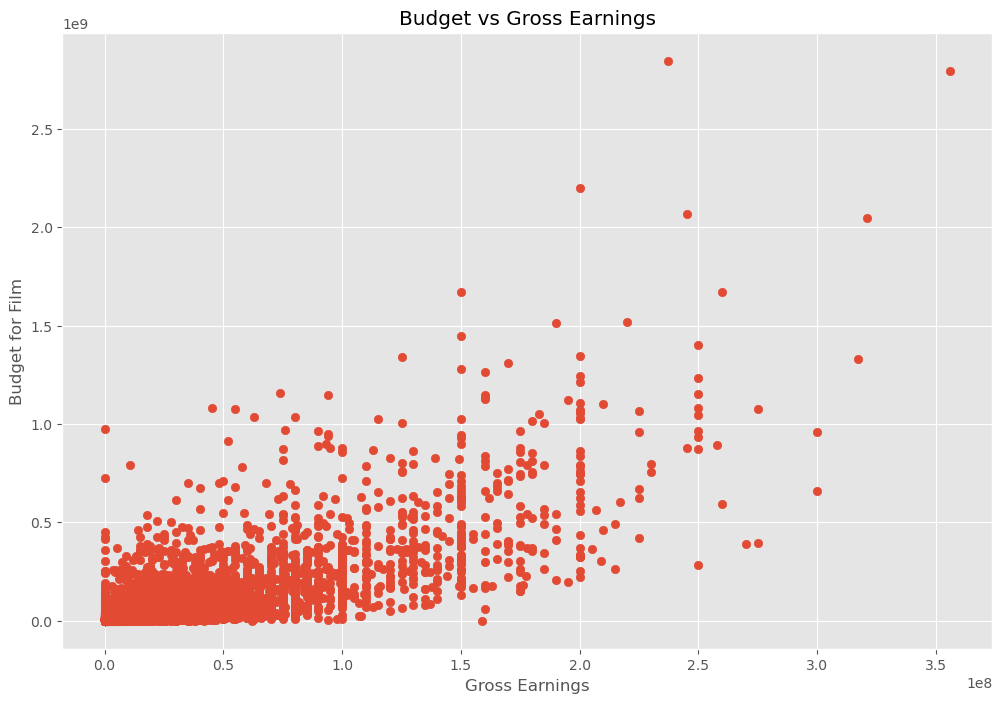

In [12]:
# hypothesis: more budget => more revenue (high correlation)
# scatterplot with budget vs gross revenue to visualise the relation

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

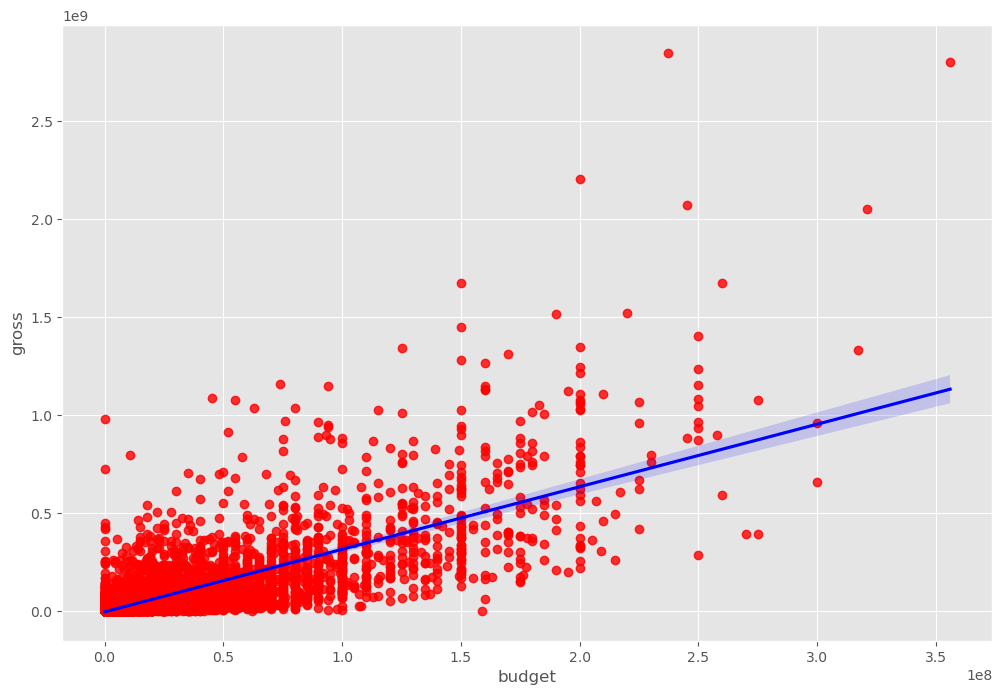

In [79]:
# Plot regression budget vs gross using seaborn to visualise the correlation graph

sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [13]:
# we can see that there is positive correlation
# lets calculate the amount of correlation

df.corr(method='pearson') # default method is pearson. other methods are kendall, spearman etc.

/var/folders/ls/rmcmq1ls5gj5_h_glpkp1lch0000gn/T/ipykernel_4885/2309374620.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') # default method is pearson. other methods are kendall, spearman etc.


year     score     votes    budget     gross   runtime
year     1.000000  0.092616  0.222427  0.309212  0.261900  0.116358
score    0.092616  1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.222427  0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.309212  0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.261900  0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.116358  0.394564  0.306984  0.268372  0.244339  1.000000

/var/folders/ls/rmcmq1ls5gj5_h_glpkp1lch0000gn/T/ipykernel_4885/4087722100.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


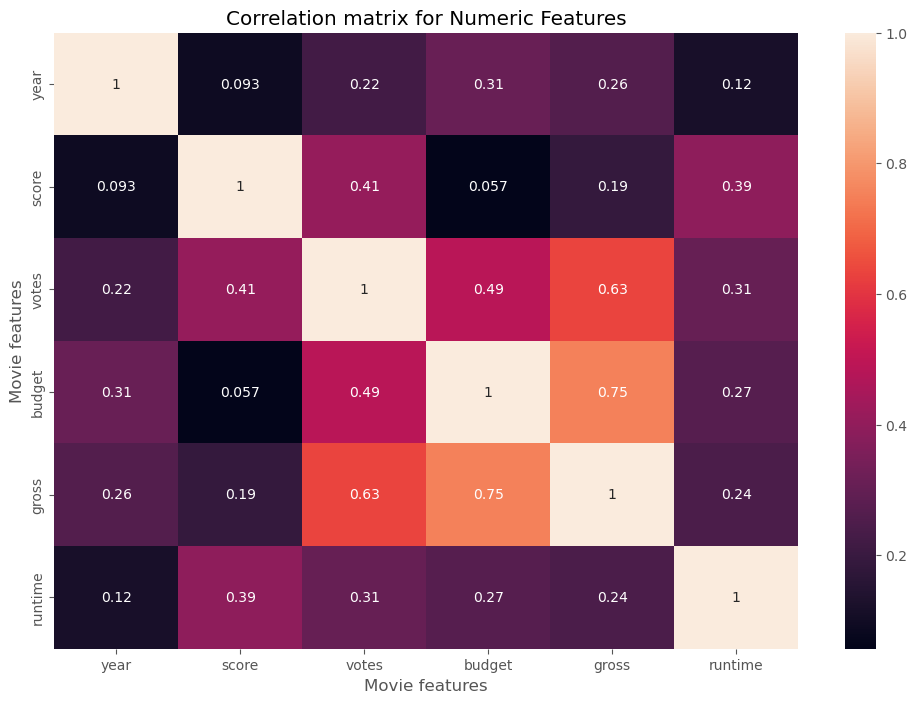

In [14]:
# visualization of correlation matrix

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [15]:
# convert categorical data in the DataFrame into a format that machine learning algorithms can work with

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head(5)

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       7      6  1980      1706    8.4   927000.0      2589    4015   
1  5573       7      1  1980      1493    5.8    65000.0      2269    1633   
2  5142       5      0  1980      1772    8.7  1200000.0      1111    2568   
3   286       5      4  1980      1493    7.7   221000.0      1301    2001   
4  1027       7      4  1980      1544    7.3   108000.0      1054     522   

   star  country    budget      gross  company  runtime  yearcorrect  
0  1048       55  19000000   46998772     2320    146.0            0  
1   328       56   4500000   58853106      732    104.0            0  
2  1746       56  18000000  538375067     1541    124.0            0  
3  2247       56   3500000   83453539     1813     88.0            0  
4   411       56   6000000   39846344     1778     98.0            0

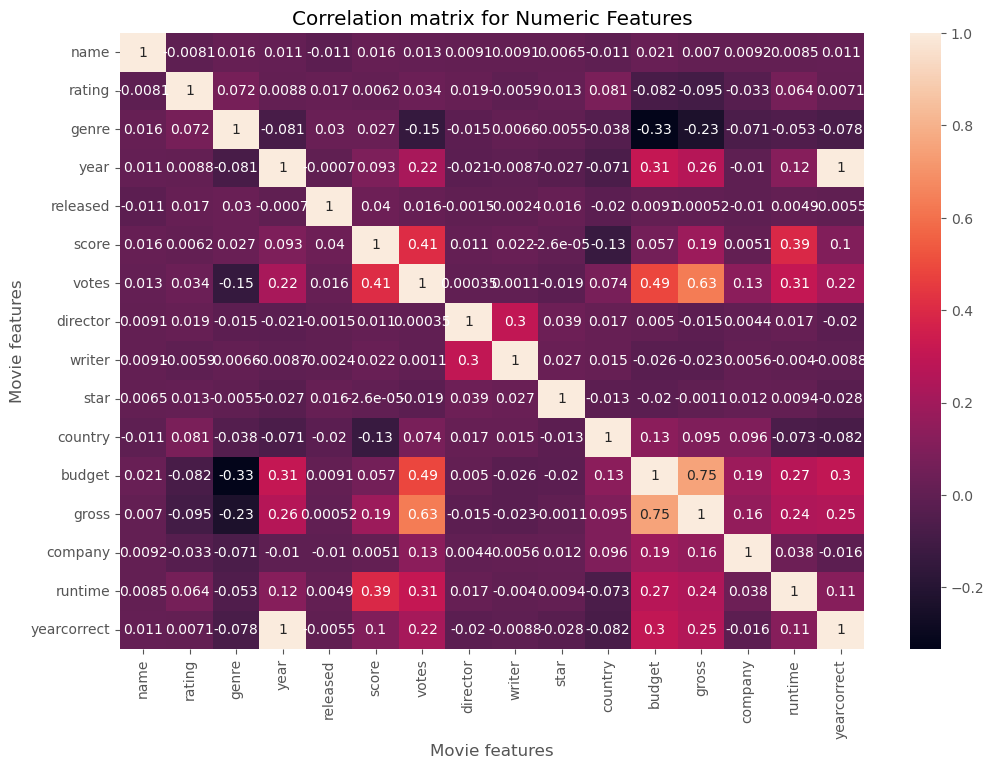

In [83]:
# visualization of correlation matrix

correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [16]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [17]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

genre   budget   -0.334021
budget  genre    -0.334021
gross   genre    -0.234297
genre   gross    -0.234297
votes   genre    -0.145296
dtype: float64

In [18]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        gross          0.632870
gross        votes          0.632870
budget       gross          0.750157
gross        budget         0.750157
year         yearcorrect    0.997295
yearcorrect  year           0.997295
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [19]:
# votes and budget have the highest correlation to gross earnings
# company has low earnings.